# [LUNG] batch effect correction

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

p_root = "/home/colombelli/Documents/datasets/lung cancer/intersect/"
df0_name = "GSE19188.csv"
df1_name = "GSE18842.csv"
df2_name = "GSE19804.csv"
df3_name = "GSE27262.csv"

In [2]:
df0 = pd.read_csv(p_root+df0_name, index_col=0)
df1 = pd.read_csv(p_root+df1_name, index_col=0)
df2 = pd.read_csv(p_root+df2_name, index_col=0)
df3 = pd.read_csv(p_root+df3_name, index_col=0)

In [7]:
dfs = [df0,df1,df2,df3]
batches_qtd = [len(df) for df in dfs]
batches_qtd

[156, 90, 114, 48]

In [9]:
batches = []
for i, qtd in enumerate(batches_qtd):
    batches += [i for _ in range(qtd)]

In [16]:
concat_df = pd.concat(dfs)
concat_df = concat_df.iloc[:, :-1].T
concat_df

,GSM475656,GSM475657,GSM475658,GSM475659,GSM475660,GSM475661,GSM475662,GSM475663,GSM475664,GSM475665,...,901,903,905,907,909,911,913,915,917,919
KRTAP9-9,-0.136267,-0.072227,0.010899,-0.036681,0.001586,0.054160,-0.258150,0.042964,-0.008917,-0.075195,...,3.073051,2.767560,2.955912,2.684401,2.873465,2.749760,2.850272,2.683395,2.716642,2.711489
LINC01139,0.028631,-0.075312,-0.036879,-0.181382,-0.070997,-0.130438,-0.143312,0.061181,0.468879,-0.363260,...,2.643602,3.650443,3.621798,4.286059,3.231435,2.835087,2.939259,4.361670,3.074457,4.143572
CACNA2D4,-0.040163,0.028328,0.105889,0.250773,0.012923,-0.182722,-0.249966,0.061471,0.012626,0.106178,...,5.680033,5.539127,5.737325,5.284404,5.530839,5.386020,5.513541,5.438769,5.558446,5.490680
RBM5,-0.321007,0.127194,-0.054312,0.232864,-0.166787,0.064235,0.061478,0.141828,-0.101991,-0.291701,...,7.705301,7.654195,7.129505,7.434582,7.575074,7.360752,7.983324,7.832605,7.162729,6.893774
CDC42BPA,0.095337,-0.047280,0.214704,0.185177,-0.018956,-0.280913,1.262051,0.038829,0.325601,-0.021997,...,6.173991,6.548811,6.708763,7.106463,6.968860,6.471294,6.129058,6.905080,6.153324,7.278288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RASAL1,0.542622,-0.517124,-0.609288,-0.429584,-0.006489,-0.175340,-0.363913,-0.679012,0.415450,0.232976,...,6.176509,6.260195,5.729867,6.058600,5.546756,5.980147,5.552847,5.654476,5.938631,6.111537
ZNF625,0.404099,0.021217,-0.188704,0.444177,0.132578,0.123283,-0.144374,0.107489,0.156876,0.093734,...,5.353639,5.303368,5.163837,5.140448,5.351642,5.494929,5.046767,5.429968,5.173443,5.160722
CNTD1,0.068433,0.244386,-0.269972,-0.188418,0.267531,-0.043397,-0.073526,0.092351,-0.176226,0.049486,...,4.157878,4.138073,3.984253,4.189734,3.773907,4.508716,5.138813,4.148961,3.938058,3.888989
LOC440864,-0.028198,0.046447,0.047876,-0.131085,-0.010365,-0.018358,0.086433,-0.087837,0.500046,-0.059991,...,3.830890,3.788271,3.786486,3.610877,3.789976,3.633429,3.709399,3.643668,3.649535,3.751134


In [17]:
len(batches)

408

In [19]:
from combat.pycombat import pycombat

In [20]:
df_corrected = pycombat(concat_df,batches)

Found 4 batches.
Adjusting for 0 covariate(s) or covariate level(s).


/home/colombelli/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [22]:
post_batch_dfs = {}
keys = ["GSE19188", "GSE18842", "GSE19804", "GSE27262"]

start_index=0
for i, qtd in enumerate(batches_qtd):
    post_batch_dfs[keys[i]] = df_corrected.iloc[:, start_index:start_index+qtd]
    start_index = start_index+qtd

In [24]:
batched_dfs = []
for key in post_batch_dfs:
    batched_dfs.append(post_batch_dfs[key].T)

In [26]:
for df in batched_dfs:
    print(len(df))

156
90
114
48


In [28]:
for i, df in enumerate(batched_dfs):
    df['class'] = dfs[i]['class']

In [37]:
for i, df in enumerate(batched_dfs):
    df.to_csv(p_root+keys[i]+"_pycombat.csv")

In [30]:
import seaborn as sns

def boxplot_df(df):
    x = sns.boxplot(data=df)
    x.set(xticklabels=[])
    x.tick_params(bottom=False)
    x.set(xlabel=None)
    plt.show()
    return

def get_n_class(df, cls, n):
    selected = df.loc[df['class']==cls, :]
    selected = selected.sample(frac=1)
    try:
        return selected.iloc[:n, :]
    except:
        return selected


20 random samples each dataset:


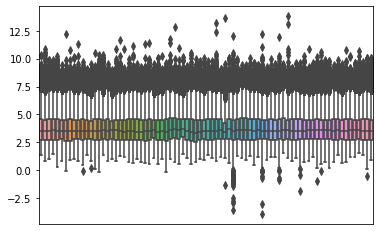


20 random NORMAL samples each dataset:


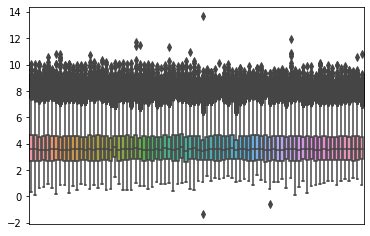


20 random TUMOR samples each dataset:


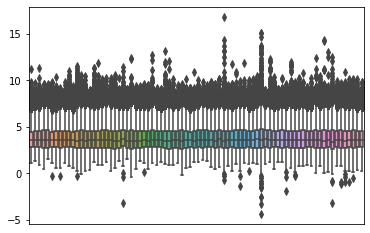

In [31]:
dfs = batched_dfs

#ALL SAMPLES
dfs20 = []
for df in dfs:
    df = df.sample(frac=1)
    dfs20.append(df.iloc[0:20, 0:-1])

dfConc = pd.concat([dfs20[0], dfs20[1], dfs20[2], dfs20[3]]).T
print("\n20 random samples each dataset:")
boxplot_df(dfConc)


#NORMAL SAMPLES
dfs20 = []
for df in dfs:
    df = df.sample(frac=1)
    pldf = get_n_class(df, 0, 20)
    dfs20.append(pldf.iloc[:, 0:-1])

dfConc = pd.concat([dfs20[0], dfs20[1], dfs20[2], dfs20[3]]).T
print("\n20 random NORMAL samples each dataset:")
boxplot_df(dfConc)


#TUMOR SAMPLES
dfs20 = []
for df in dfs:
    df = df.sample(frac=1)
    pldf = get_n_class(df, 1, 20)
    dfs20.append(pldf.iloc[:, 0:-1])

dfConc = pd.concat([dfs20[0], dfs20[1], dfs20[2], dfs20[3]]).T
print("\n20 random TUMOR samples each dataset:")
boxplot_df(dfConc)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import metrics

def get_x(df):
    return df.loc[:, df.columns != 'class']
    
def get_y(df):
    return df.loc[:, ['class']].T.values[0]

def get_probs_positive_class(pred):
        positive_probs = []

        for prediction in pred:
            positive_probs.append(prediction[1])
        return positive_probs
    

def load_dataframes(train_path, test_path):
    train_df = pd.read_csv(train_path, index_col=0)
    test_df = pd.read_csv(test_path, index_col=0)
    return train_df, test_df


def cross_testing_accuracy(train_df, test_df, genes_ranking_path, thresholds, trained_clfs=None):
    gdf = pd.read_csv(genes_ranking_path, index_col=0)
    genes = list(gdf.index)
    test_df = test_df.sample(frac=1)
    for i, threshold in enumerate(thresholds):
        print("Cross-testing with threshold:", threshold)
        ts_top = test_df.loc[:, genes[0:threshold]+['class']]

        if trained_clfs:
            clf = trained_clfs[i]
            
        else:
            clf = GBC()
            tr_top = train_df.loc[:, genes[0:threshold]+['class']]
            X_train = get_x(tr_top)
            y_train = get_y(tr_top)
            clf.fit(X_train, y_train)
        

        X_test = get_x(ts_top)
        y_test = get_y(ts_top)

        acc_score = clf.score(X_test, y_test)

        pred = clf.predict_proba(X_test)
        y_pred = np.argmax(pred, axis=1)
        pred = get_probs_positive_class(pred)

        roc_auc = metrics.roc_auc_score(np.array(y_test, dtype=int), pred)
        pred_accuracy = metrics.accuracy_score(y_test, y_pred)

        print("Accuracy with .score:", acc_score)
        print("Accuracy with .predict_proba:", pred_accuracy)
        print("ROC AUC:", roc_auc)
        print("Predictions:", y_pred)
        print("\n")
        

def get_trained_clfs(train_df, thresholds, genes_ranking_path):
    
    trained_clfs = []
    gdf = pd.read_csv(genes_ranking_path, index_col=0)
    genes = list(gdf.index)
    
    for threshold in thresholds:
        print("Training with threshold:", threshold)
        clf = GBC()
        
        tr_top = train_df.loc[:, genes[0:threshold]+['class']]

        X_train = get_x(tr_top)
        y_train = get_y(tr_top)

        clf.fit(X_train, y_train)
        trained_clfs.append(deepcopy(clf))
    
    return trained_clfs

In [38]:
ths = [1, 5, 10, 15, 20, 50, 100, 200, 300, 400]# 1000, 5000, -1]
genes_rank = "/home/colombelli/Documents/experiments/rankingPycombat/het_GSE19188_pycombat_E1/selection/agg_ranking_th5.csv"

for df in dfs:
    df = df.sample(frac=1)
    
df_train = pd.concat([dfs[0].loc[dfs[0]['class'] == 0], dfs[0].loc[dfs[0]['class'] == 1].iloc[0:65, :]]).sample(frac=1)
trained_clfs = get_trained_clfs(df_train, ths, genes_rank)

Training with threshold: 1
Training with threshold: 5
Training with threshold: 10
Training with threshold: 15
Training with threshold: 20
Training with threshold: 50
Training with threshold: 100
Training with threshold: 200
Training with threshold: 300
Training with threshold: 400


In [39]:
cross_testing_accuracy(None, df1, genes_rank, ths, trained_clfs)

Cross-testing with threshold: 1
Accuracy with .score: 0.6111111111111112
Accuracy with .predict_proba: 0.6111111111111112
ROC AUC: 0.8008893280632411
Predictions: [0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1]


Cross-testing with threshold: 5
Accuracy with .score: 0.7111111111111111
Accuracy with .predict_proba: 0.7111111111111111
ROC AUC: 0.9184782608695653
Predictions: [0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]


Cross-testing with threshold: 10
Accuracy with .score: 0.8
Accuracy with .predict_proba: 0.8
ROC AUC: 0.9765316205533597
Predictions: [0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0
 0 0 0 1 1 0 1 0 0

In [41]:
cross_testing_accuracy(None, df2, genes_rank, ths, trained_clfs)

Cross-testing with threshold: 1
Accuracy with .score: 0.5350877192982456
Accuracy with .predict_proba: 0.5350877192982456
ROC AUC: 0.47244458128078815
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0]


Cross-testing with threshold: 5
Accuracy with .score: 0.5087719298245614
Accuracy with .predict_proba: 0.5087719298245614
ROC AUC: 0.4428879310344828
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


Cross-testing with threshold: 10
Accuracy with .score: 0.6578947368421053
Accuracy with .predict_proba: 0.6578947368421053
ROC AUC: 0.6811884236453202
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 

In [42]:
cross_testing_accuracy(None, df3, genes_rank, ths, trained_clfs)

Cross-testing with threshold: 1
Accuracy with .score: 0.75
Accuracy with .predict_proba: 0.75
ROC AUC: 0.75
Predictions: [1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0]


Cross-testing with threshold: 5
Accuracy with .score: 0.5208333333333334
Accuracy with .predict_proba: 0.5208333333333334
ROC AUC: 0.7187500000000001
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


Cross-testing with threshold: 10
Accuracy with .score: 0.5833333333333334
Accuracy with .predict_proba: 0.5833333333333334
ROC AUC: 0.7291666666666666
Predictions: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0]


Cross-testing with threshold: 15
Accuracy with .score: 0.75
Accuracy with .predict_proba: 0.75
ROC AUC: 0.7916666666666667
Predictions: [0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0]


Cross-testin